# Project 2 Model Classification
### Serena Shah | ss94574
## Part 1

We first import necessary libraries and and loading the data into a Pandas dataframe.

In [361]:
import pandas as pd
import numpy as np

# read in data
bc = pd.read_csv('data/project2.data')

We now identify the shape and size of the raw data.

In [362]:
# data shape
bc.shape

(286, 10)

In [363]:
# data size
bc.size

2860

Next we look at information about the data types of the data columns.

In [364]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


The non-null counts for all variables aligns with the length of the dataframe: 286. This indicates there are no NaN or missing values to account for in preprocessing on first look. Further investigation shows questionable values in the `node-caps` and `breast-quad` columns.

In [365]:
bc['node-caps'].unique()

array(['no', 'yes', '?'], dtype=object)

In [366]:
bc['breast-quad'].unique()

array(['left_low', 'right_up', 'left_up', 'right_low', 'central', '?'],
      dtype=object)

There are `?` values in both the `node-caps` and `breast-quad` columns. These need to be replaced with their most frequent value, or the mode of the column.

In [367]:
# replace ? with the mode for breast-quad and node-caps
bc['breast-quad'] = bc['breast-quad'].replace('?', bc['breast-quad'].mode()[0])
bc['node-caps'] = bc['node-caps'].replace('?', bc['node-caps'].mode()[0])

Now we can see that the `?` values no longer exist for each column below.

In [368]:
bc['breast-quad'].unique()

array(['left_low', 'right_up', 'left_up', 'right_low', 'central'],
      dtype=object)

In [369]:
bc['node-caps'].unique()

array(['no', 'yes'], dtype=object)

Now we'll look into variable datatypes.

In [370]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


Other than the `deg-malig` variable, which is of `int` type, all variables in the breast cancer dataset are of `object` types. Let's get a better idea of the reported value formats for each variable.

In [371]:
bc.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


Because variables with numeric values are reported in ranges, and are therefore ordinal, there is no need for one-hot encoding, though they can be converted to `category` type. However the `class`, `menopause`, `node-caps`, `breast`, `breast-quad`, and `iraddiat` variables are non-ordinal categorical and therefore require a conversion to `category` type through one-hot encoding. 

First we'll cast the column values to categories.

In [372]:
# cast column vals to type category
bc['class'] = bc['class'].astype("category")
bc['age'] = bc['age'].astype("category")
bc['menopause'] = bc['menopause'].astype("category")
bc['tumor-size'] = bc['tumor-size'].astype("category")
bc['inv-nodes'] = bc['inv-nodes'].astype("category")
bc['node-caps'] = bc['node-caps'].astype("category")
bc['breast'] = bc['breast'].astype("category")
bc['breast-quad'] = bc['breast-quad'].astype("category")
bc['irradiat'] = bc['irradiat'].astype("category")

bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   class        286 non-null    category
 1   age          286 non-null    category
 2   menopause    286 non-null    category
 3   tumor-size   286 non-null    category
 4   inv-nodes    286 non-null    category
 5   node-caps    286 non-null    category
 6   deg-malig    286 non-null    int64   
 7   breast       286 non-null    category
 8   breast-quad  286 non-null    category
 9   irradiat     286 non-null    category
dtypes: category(9), int64(1)
memory usage: 6.6 KB


We can see that all categorical type columns have been converted to type `category`. Before one-hot encoding, we will perform univariate analysis on the dataset through visualization.

In [373]:
# import necessary libs
import seaborn as sns
import matplotlib.pyplot as plt

We'll first visualize the count for each menopause status (either `premeno`, `ge40`, or `lt40`) for breast cancer patients.

Text(0.5, 0, 'Menopause Status')

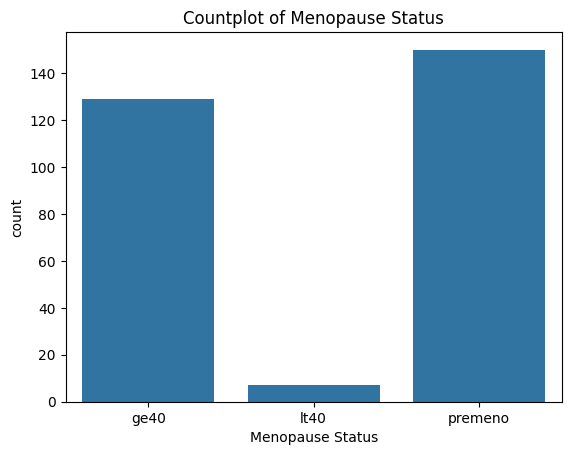

In [374]:
# countplot of menopause status
sns.countplot(x=bc['menopause'])
plt.title("Countplot of Menopause Status")
plt.xlabel("Menopause Status")

Next we'll visualize the count for the breast location with cancer.

Text(0.5, 0, 'Breast')

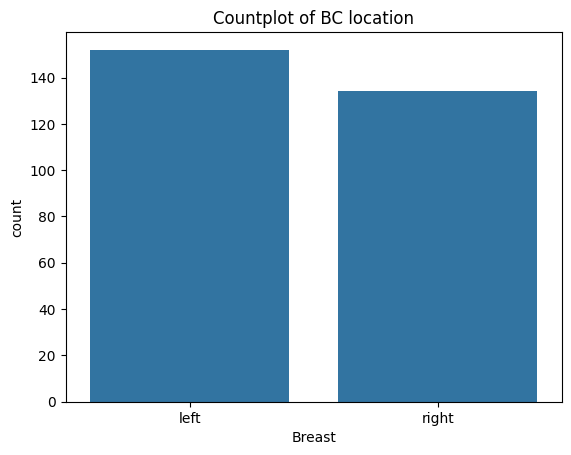

In [375]:
# countplot of BC location
sns.countplot(x=bc['breast'])
plt.title("Countplot of BC location")
plt.xlabel("Breast")

It seems that breast cancer tumors are marginally more present in the left breast than the right with about 150 counts in the left breast and about 130 counts in the right. 

Lastly, we'll visualize the ranges for tumor size in breast cancer patients.

Text(0.5, 0, 'count')

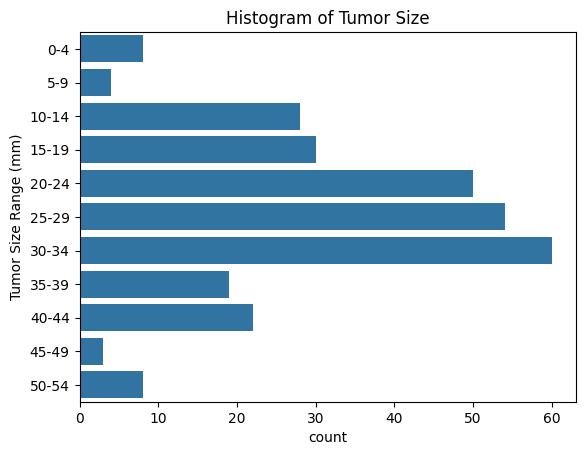

In [376]:
# count of tumor size range
category_order = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54']
sns.countplot(data=bc['tumor-size'], order=category_order)
plt.title("Histogram of Tumor Size")
plt.ylabel("Tumor Size Range (mm)")
plt.xlabel("count")

The countplot's distribution is fairly normal, though slightly skewed negative. It seems that tumor ranges are most often between 20 and 34 mm. 

Now that we've visualized the data through univariate analyses, we can convert our non-ordinal categorical columns to bits to improve the performance of our machine learning model to be instantiated later.

In [377]:
# categorical to bit conversion
bc = pd.get_dummies(bc, columns=["class", "menopause", "node-caps", "breast", "breast-quad", "irradiat"], drop_first=True)
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      286 non-null    category
 1   tumor-size               286 non-null    category
 2   inv-nodes                286 non-null    category
 3   deg-malig                286 non-null    int64   
 4   class_recurrence-events  286 non-null    bool    
 5   menopause_lt40           286 non-null    bool    
 6   menopause_premeno        286 non-null    bool    
 7   node-caps_yes            286 non-null    bool    
 8   breast_right             286 non-null    bool    
 9   breast-quad_left_low     286 non-null    bool    
 10  breast-quad_left_up      286 non-null    bool    
 11  breast-quad_right_low    286 non-null    bool    
 12  breast-quad_right_up     286 non-null    bool    
 13  irradiat_yes             286 non-null    bool    
dtypes: bool(10

We can see that each variable with *n* categories has been split into *n-1* columns.

# Part 2